In [41]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Variables**

- `age` -> edad en años


- `sex` -> M = masculino; F = femenino


- `ChestPainType` -> tipo de dolor de pecho


    - TA: Angina típica: dolor en el pecho relacionado con la disminución del suministro de sangre al corazón
    
    - ATA: Angina atípica: dolor en el pecho no relacionado con el corazón
    
    - NAP: No dolor de angina: típicamente espasmos esofágicos (no relacionados con el corazón)
    
    - ASY: Asintomáticos: dolor en el pecho que no muestra signos de enfermedad
    
- `RestingBP` -> resultados del electrocardiograma

    - Normal: Normal
    
    - ST: tener una anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV) 
    
    - LVH:  que muestren una hipertrofia ventricular izquierda probable o definida según los criterios de Estes  
    

- `Cholesterol` -> colesterol sérico en mg/dl

    - suero = LDL + HDL + .2 * trigliceridos
    
    - por encima de 200 es motivo de preocupación
    
- `FastingBS` -> (glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

    - '>126' mg/dL señal de diabetes
'Normal', 'ST', 'LVH'


- `RestingECG` -> resto resultados electrocardiograma

    - Normal: nada que destacar
    
    - ST:  anomralidad en la curva: 
        - puede variar desde síntomas leves hasta problemas graves
        - señales de latidos cardíacos no normales
        
    - LVH: hipertrofia ventricular izquierda posible o definitiva
        - Agrandamiento de la cámara de bombeo principal del corazón
        
        
- `MaxHR` -> frecuencia cardíaca máxima alcanzada


- `Exercise Angina` -> agina inducida por ejercicio 

    - 1 = si
    
    - 0 = no


- `oldpeak` -> la depresión del ST inducida por el ejercicio en relación con el reposo examina el estrés del corazón durante el ejercicio Un corazón poco saludable se estresará más


- `ST-Slope` -> la pendiente del segmento ST máximo del ejercicio

    - Up: Pendiente ascendente: mejora de la frecuencia cardíaca con el ejercicio (poco común)
    
    - Flat: Pendiente plana: cambio mínimo (corazón sano típico)
    
    - Down: Pendiente descendente: signos de un corazón poco saludable

    
    
- `HeartDisease` -> si ha tenido infarto o no (la variable respuesta). 

    - 1 = si
    - 0 = no


In [2]:
df = pd.read_csv("data/heart.csv", index_col = 0)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140.0,289.0,NaN,Normal,172.0,NaN,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,NaN,NaN,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,NaN,NaN,108.0,Y,1.5,NaN,NaN
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


EDA

    nulos -- no se puede tener
        simpleImputer
        IterativeImputer
        knnImputer
    outliers
        boxplot
        IQR
        detección de outliers
            q1 - 1.5*iqr
            q3 - 1.5*iqr
    correlación
        pairplot
        correlación de pearson -- +-1 -> relaciones lineales
        correlación de spearman -> relaciones no lineales
    relación entre variables predicotras/respuesta


# EDA

- tipos de variables

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,845.0,53.427219,9.391862,28.0,47.0,54.0,60.0,77.0
RestingBP,881.0,132.393871,18.405111,0.0,120.0,130.0,140.0,200.0
Cholesterol,826.0,200.669492,108.272041,0.0,177.0,224.0,267.0,603.0
FastingBS,872.0,0.232798,0.422857,0.0,0.0,0.0,0.0,1.0
MaxHR,845.0,136.919527,25.510581,60.0,120.0,138.0,156.0,202.0
Oldpeak,845.0,0.886982,1.053743,-2.6,0.0,0.6,1.5,6.2
HeartDisease,872.0,0.540138,0.498672,0.0,0.0,1.0,1.0,1.0


In [4]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,845.0,53.427219,9.391862,28.0,47.0,54.0,60.0,77.0
RestingBP,881.0,132.393871,18.405111,0.0,120.0,130.0,140.0,200.0
Cholesterol,826.0,200.669492,108.272041,0.0,177.0,224.0,267.0,603.0
FastingBS,872.0,0.232798,0.422857,0.0,0.0,0.0,0.0,1.0
MaxHR,845.0,136.919527,25.510581,60.0,120.0,138.0,156.0,202.0
Oldpeak,845.0,0.886982,1.053743,-2.6,0.0,0.6,1.5,6.2
HeartDisease,872.0,0.540138,0.498672,0.0,0.0,1.0,1.0,1.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Sex,826,2,M,657
ChestPainType,845,4,ASY,458
RestingECG,872,3,Normal,523
ExerciseAngina,881,2,N,522
ST_Slope,845,3,Flat,425


- hay bastantes nulos

In [6]:
df.isnull().sum()

Age               73
Sex               92
ChestPainType     73
RestingBP         37
Cholesterol       92
FastingBS         46
RestingECG        46
MaxHR             73
ExerciseAngina    37
Oldpeak           73
ST_Slope          73
HeartDisease      46
dtype: int64

In [7]:
df.isnull().sum() / df.shape[0]

Age               0.079521
Sex               0.100218
ChestPainType     0.079521
RestingBP         0.040305
Cholesterol       0.100218
FastingBS         0.050109
RestingECG        0.050109
MaxHR             0.079521
ExerciseAngina    0.040305
Oldpeak           0.079521
ST_Slope          0.079521
HeartDisease      0.050109
dtype: float64

- variables categóricas vs variables numéricas

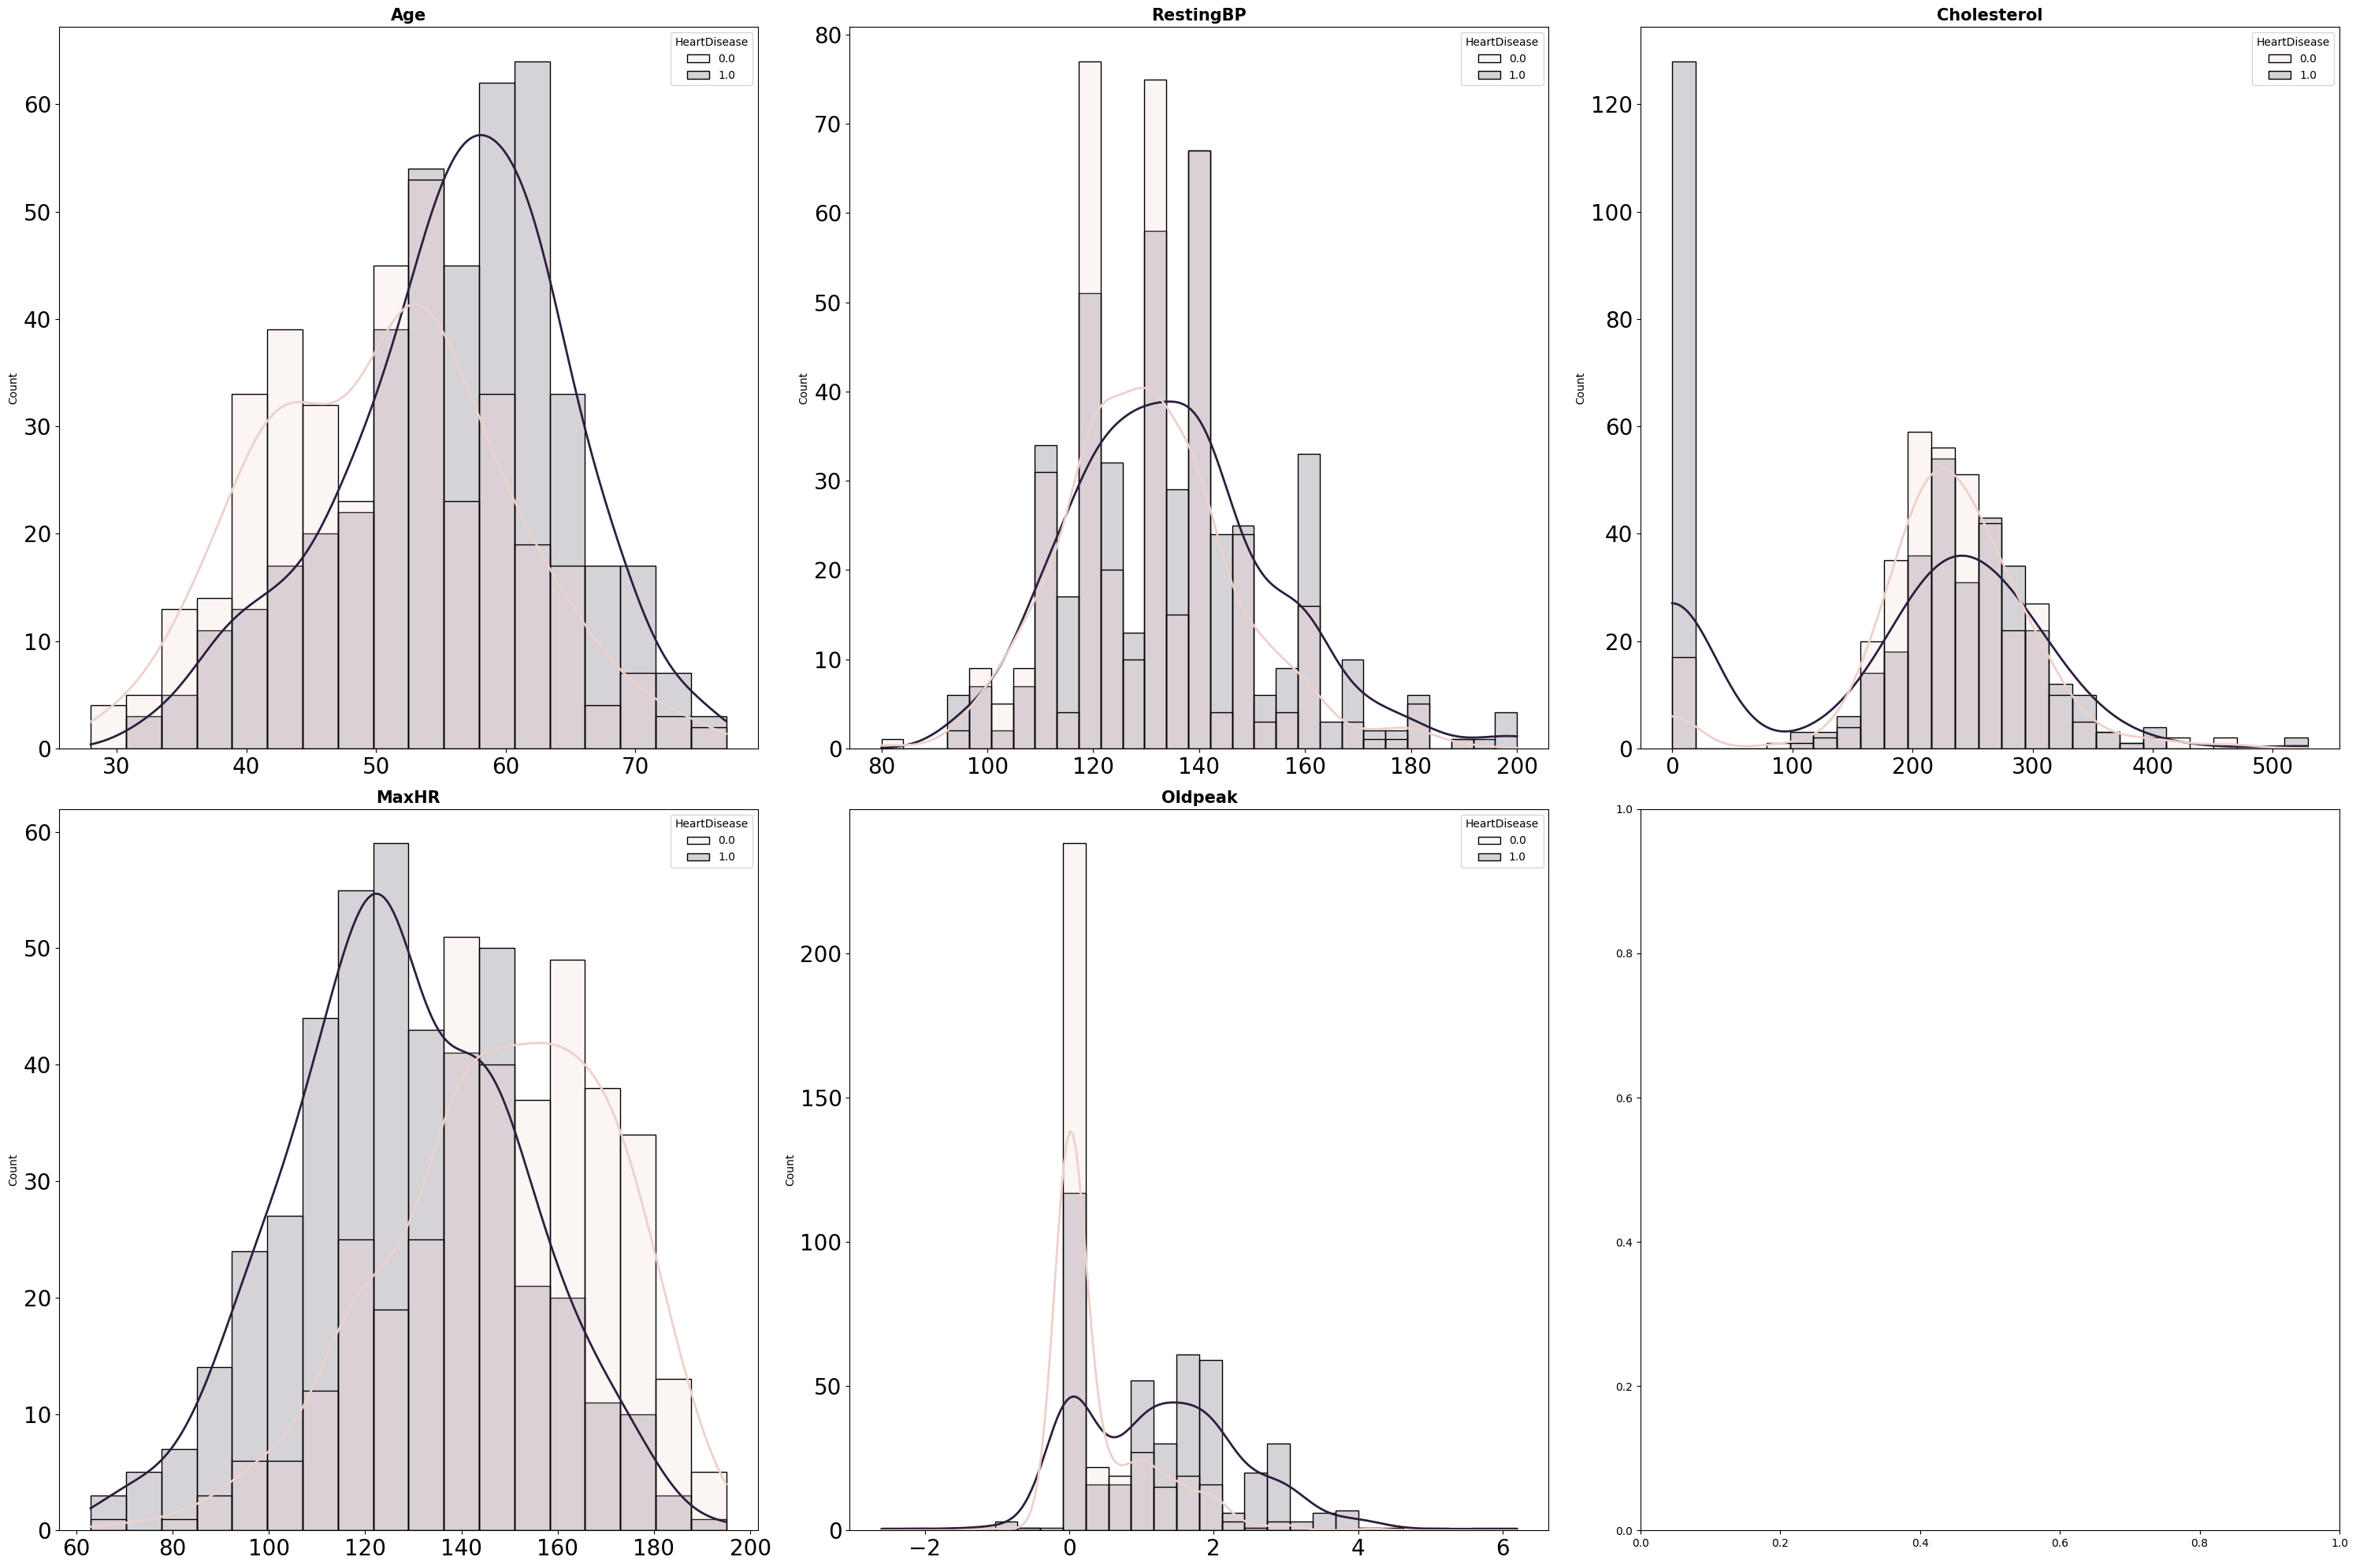

In [8]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number)
columnas_numeric.drop(['HeartDisease', 'FastingBS'], axis=1, inplace=True)

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i],
        hue = df['HeartDisease']
        )
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();# Gráfico de distribución para cada variable numérica

valores de 0 en cholesterol -- a lo mejor no se ha cogido el nulo -- hacemos una imputación (knn-imputer, par ver como se relacionan las variables)
<br>oldpeak tiene valores anómalos -- valores negativos
<br>heart rate -- más posibilidades de tener un infarto a frecuencias cardíacas bajas -- puede ser que sean más sedentarios

cambiar este chart pot el gráfico de líneas 

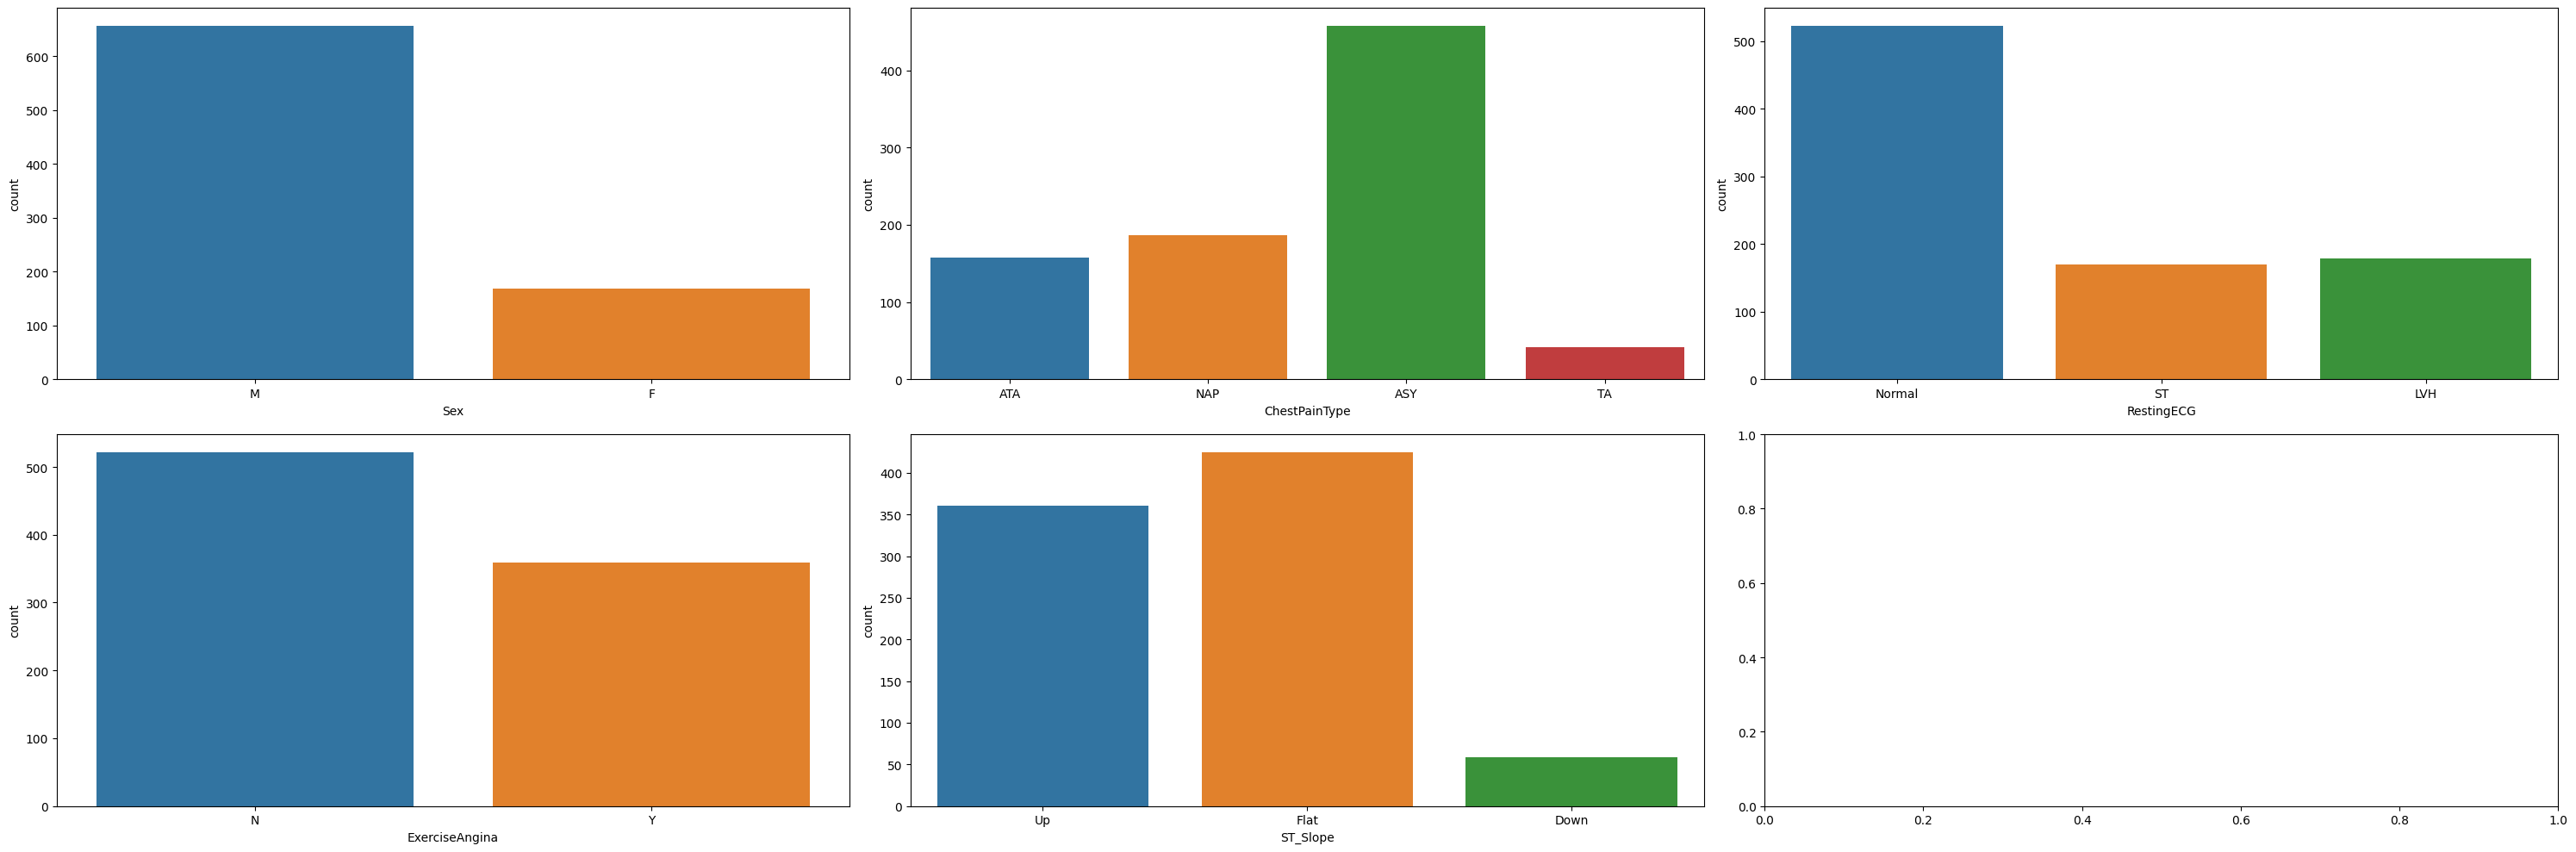

In [9]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

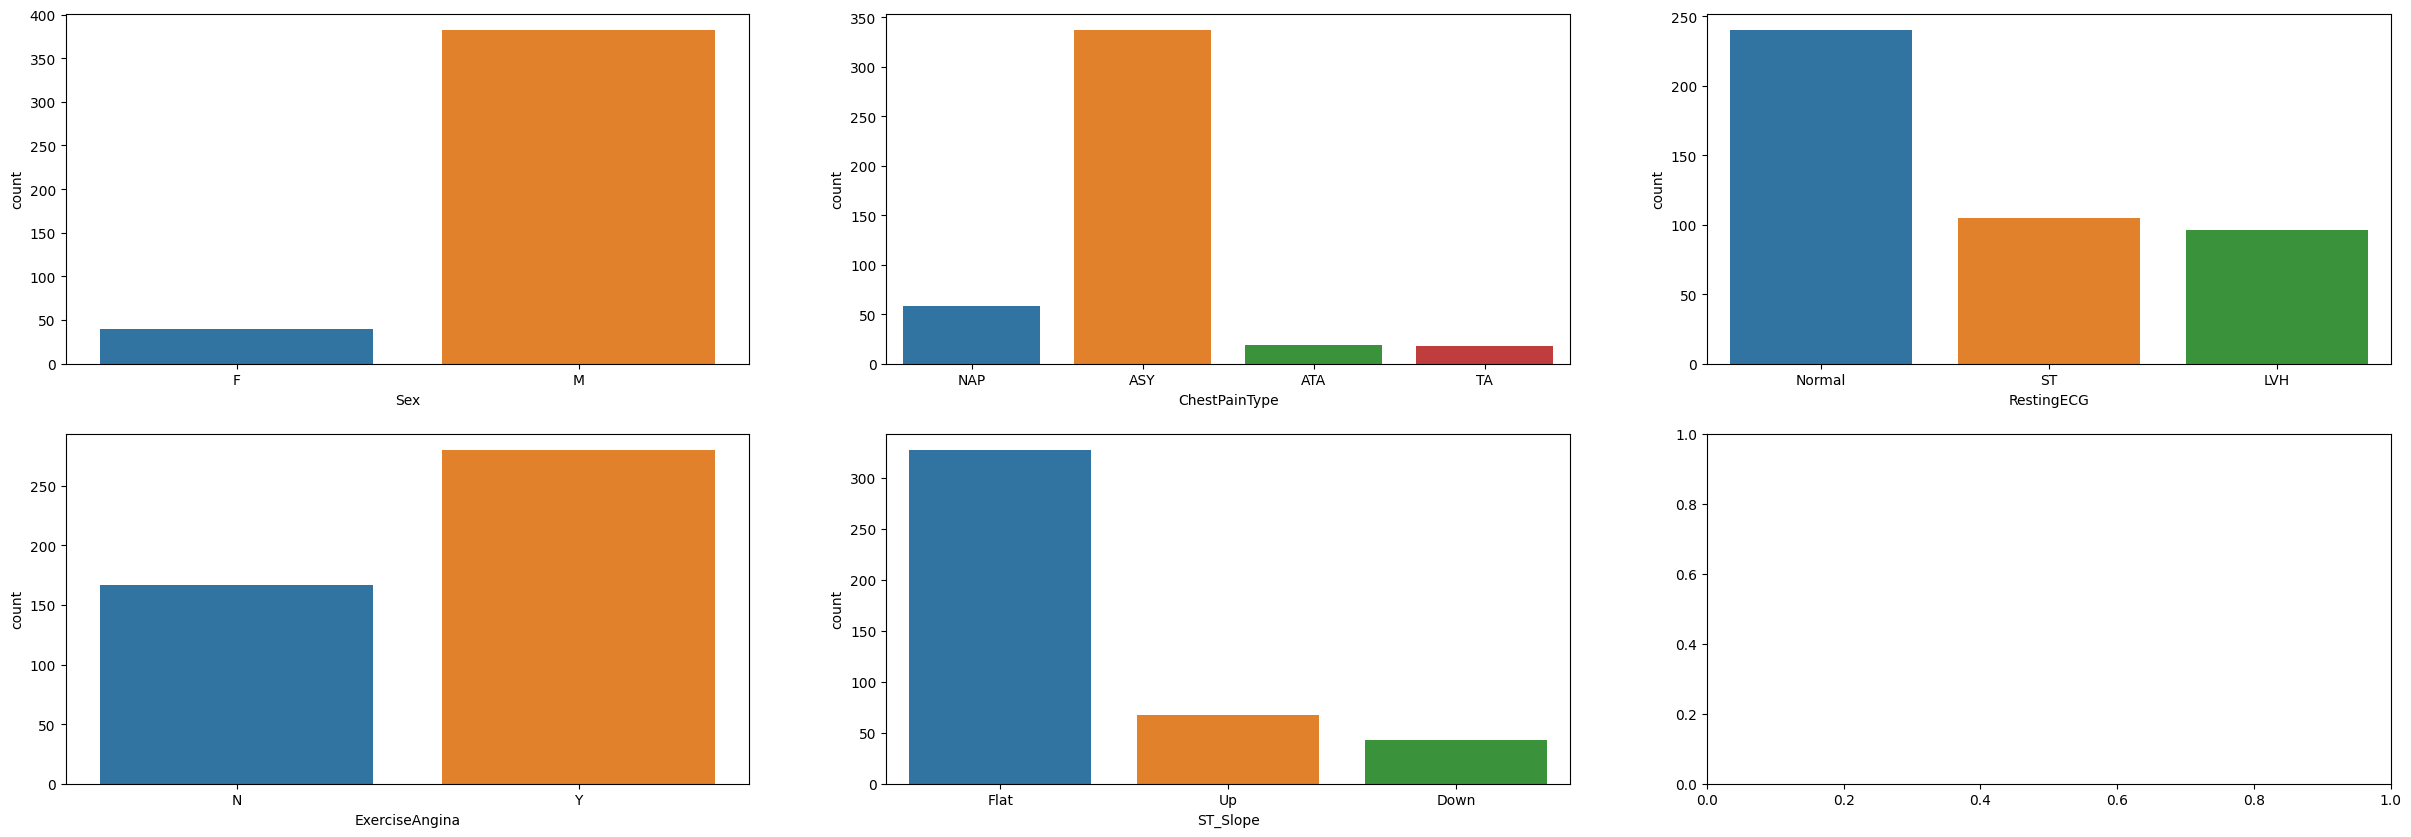

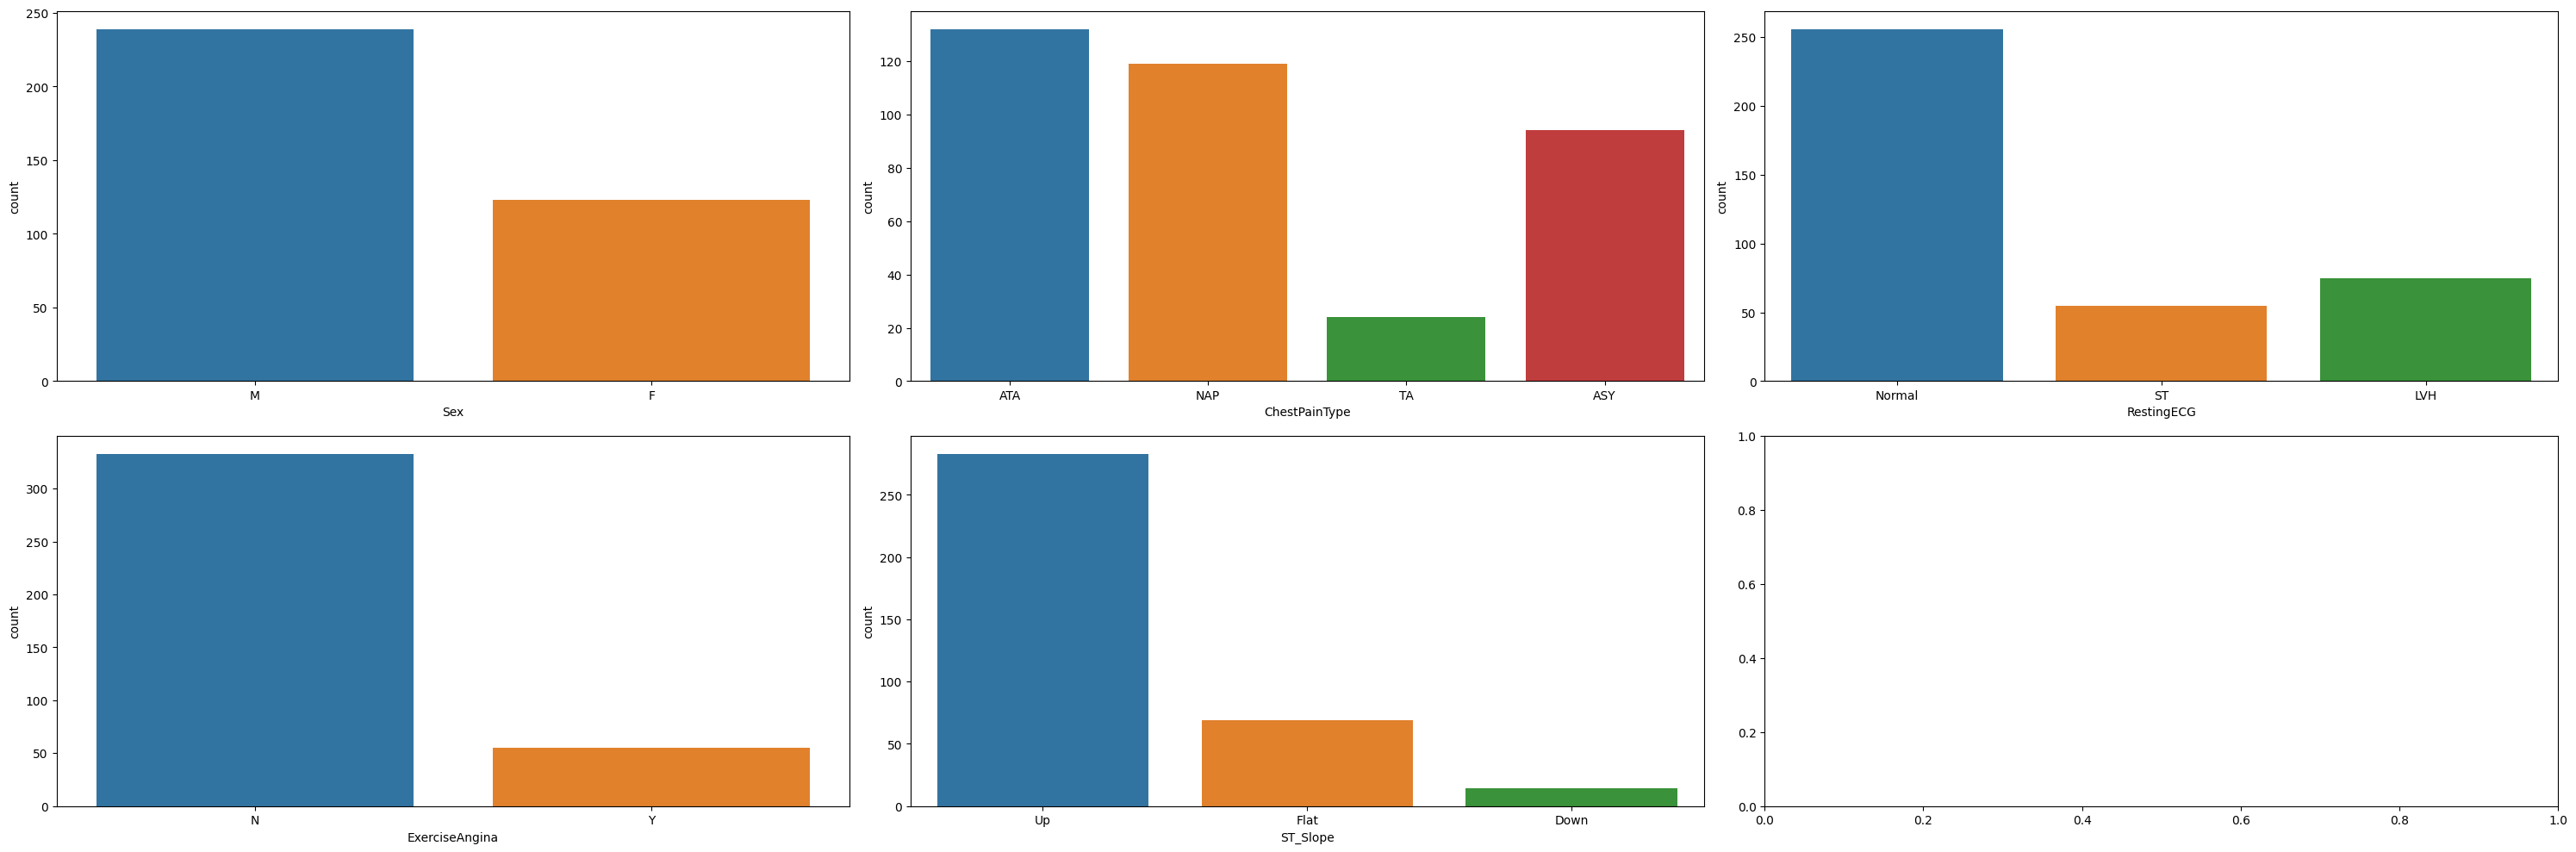

In [10]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================
df_heart = df[df['HeartDisease'] == 1]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df_heart.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df_heart[colum], 
                ax = axes[i])
    
df_no_heart = df[df['HeartDisease'] == 0]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df_heart.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df_no_heart[colum], 
                ax = axes[i])

fig.tight_layout();

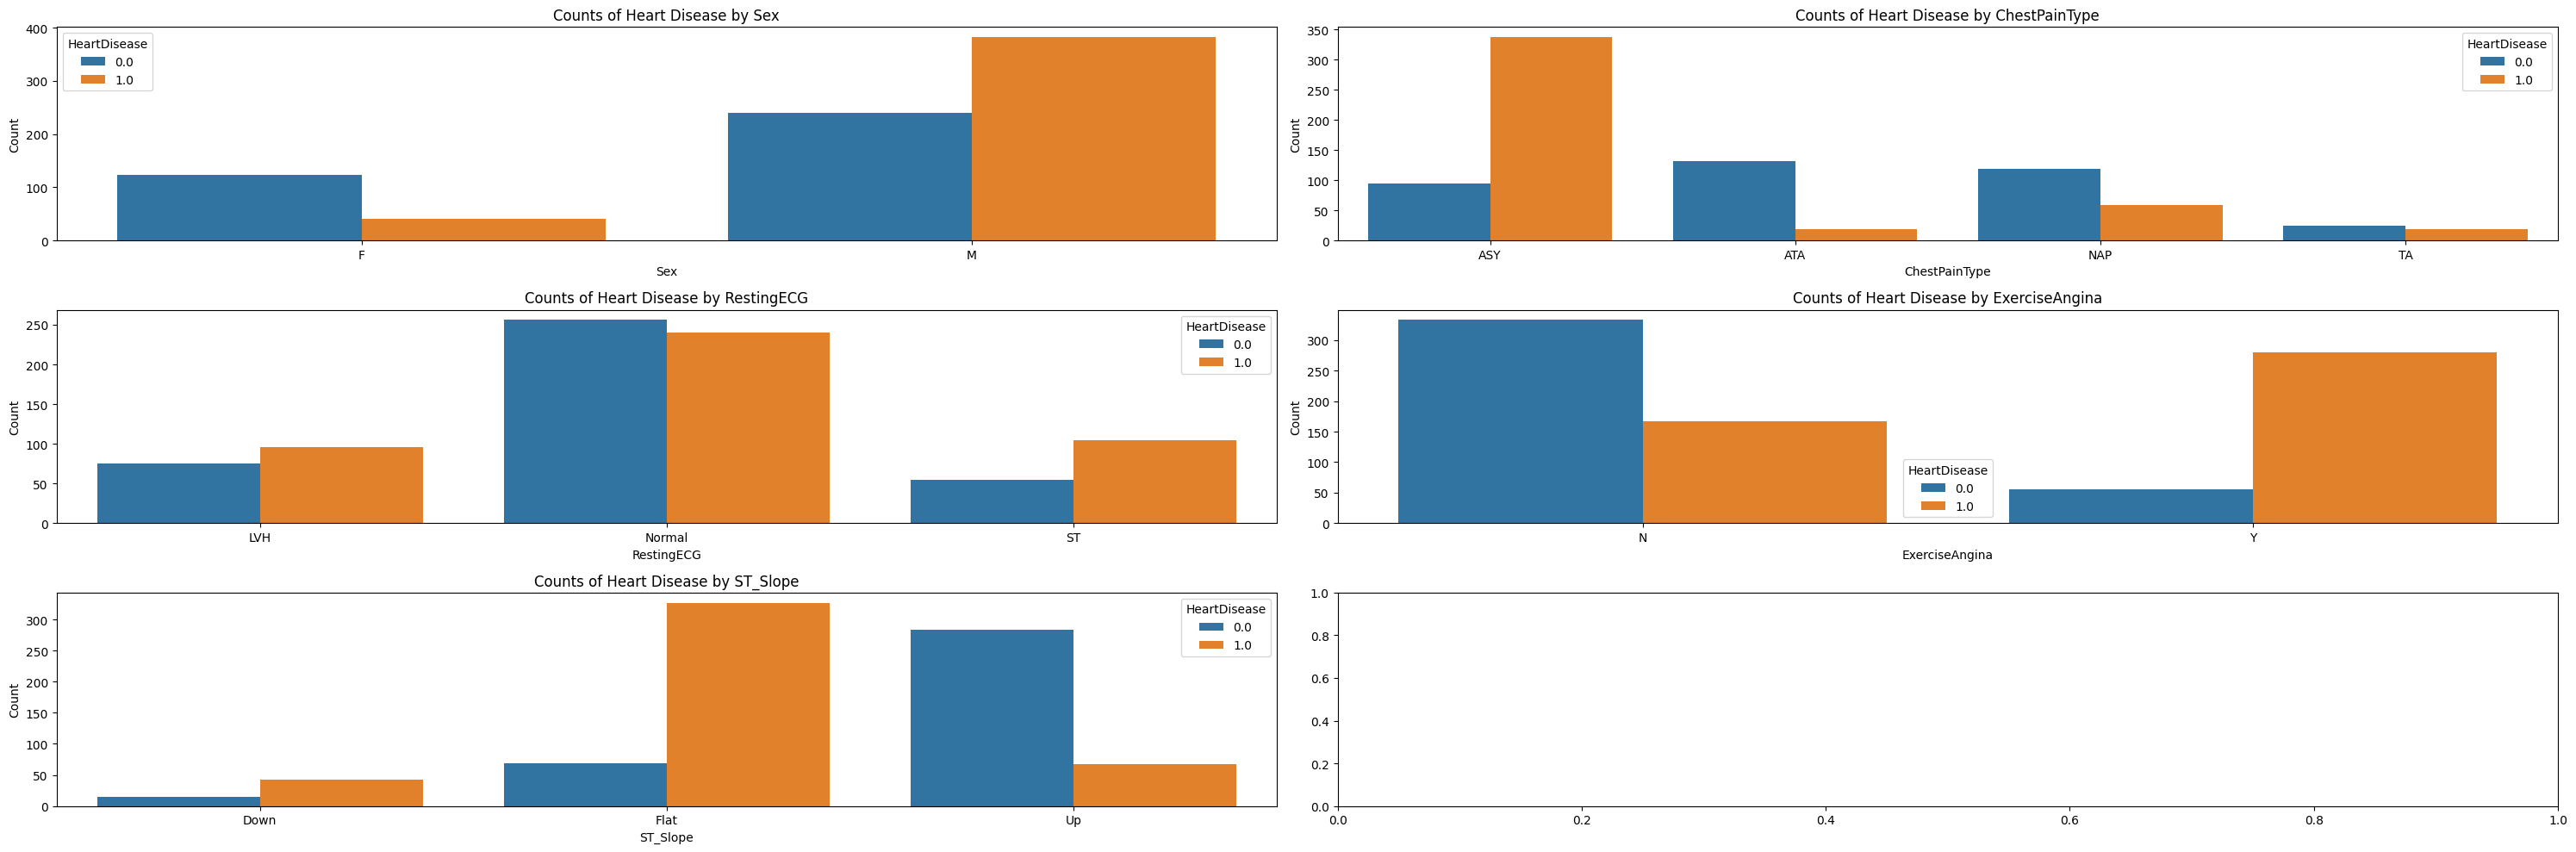

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(30,10))
axes = axes.flat
columnas_object = df.select_dtypes(include="object").columns
for i, colum in enumerate(columnas_object):
    counts = df.groupby([colum, "HeartDisease"]).size().reset_index(name="count")
    sns.barplot(x=colum, y="count", hue="HeartDisease", data=counts, ax=axes[i])
    axes[i].set_title(f"Counts of Heart Disease by {colum}")
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("Count")
fig.tight_layout()
plt.show();

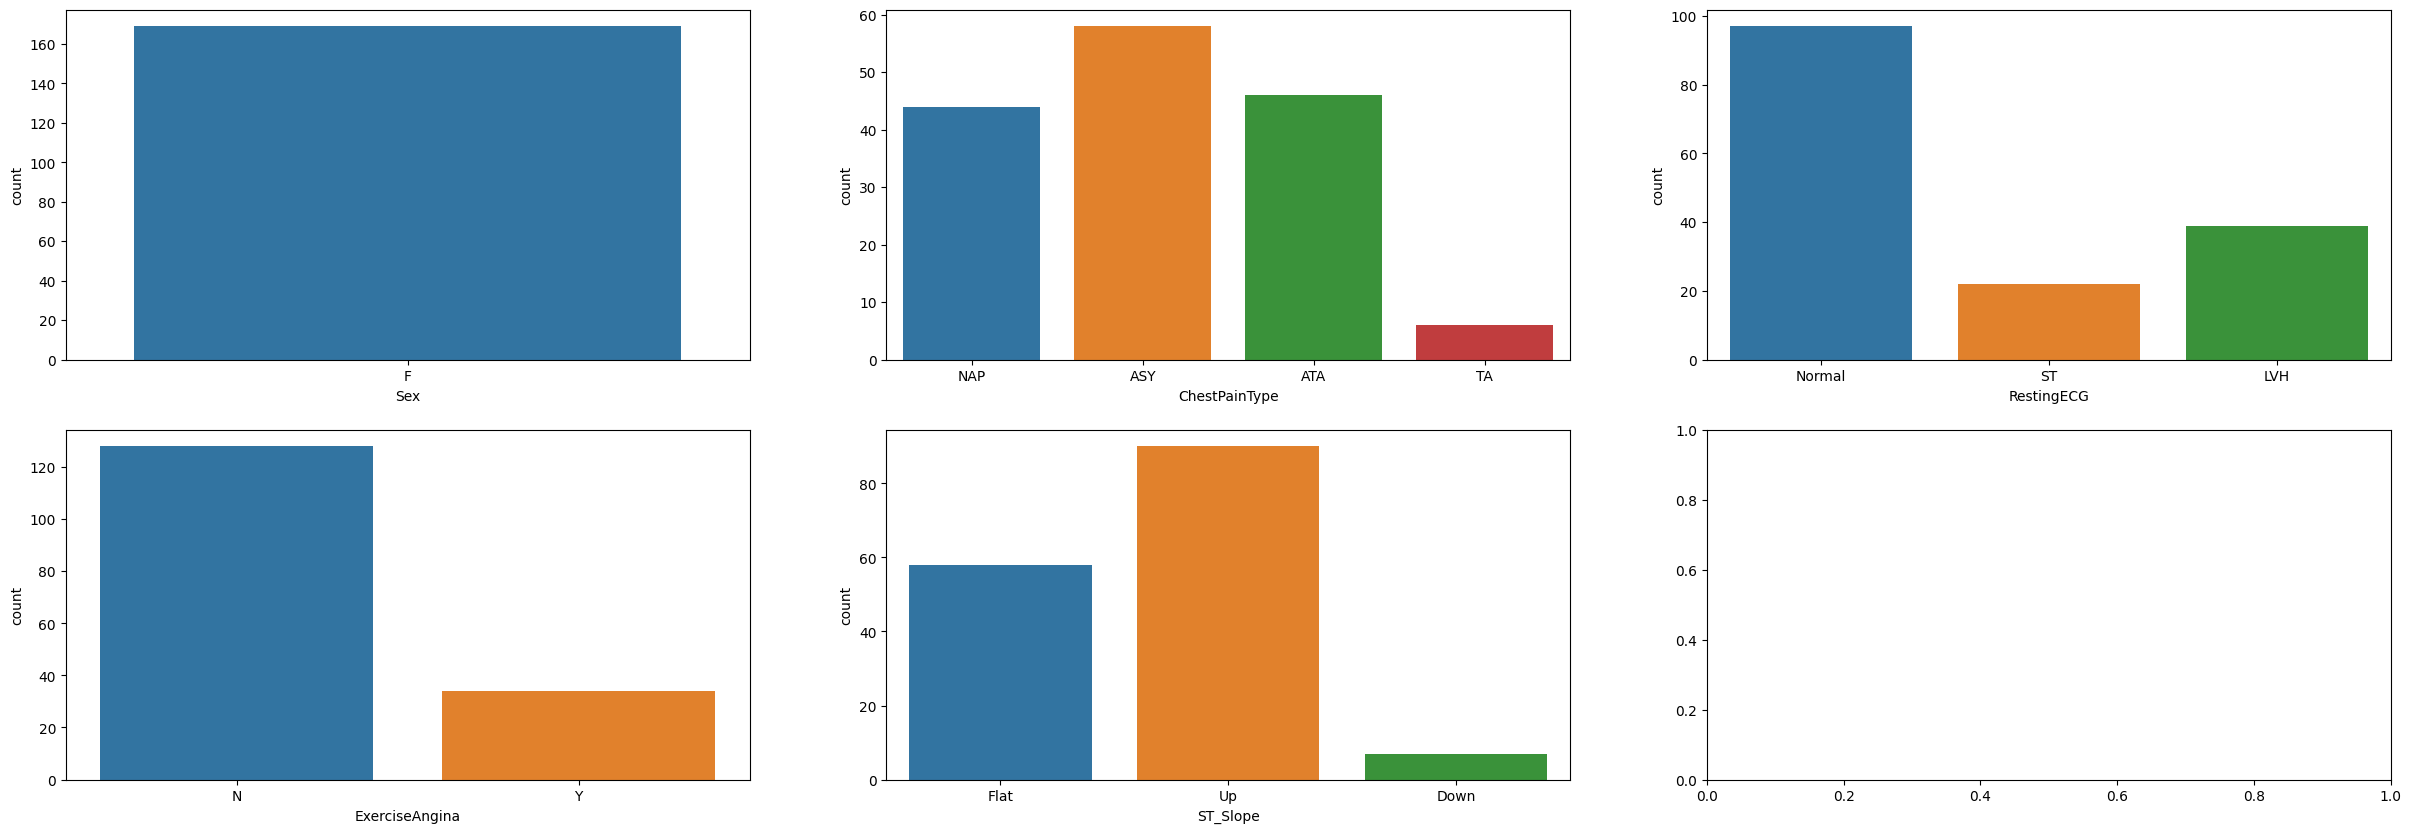

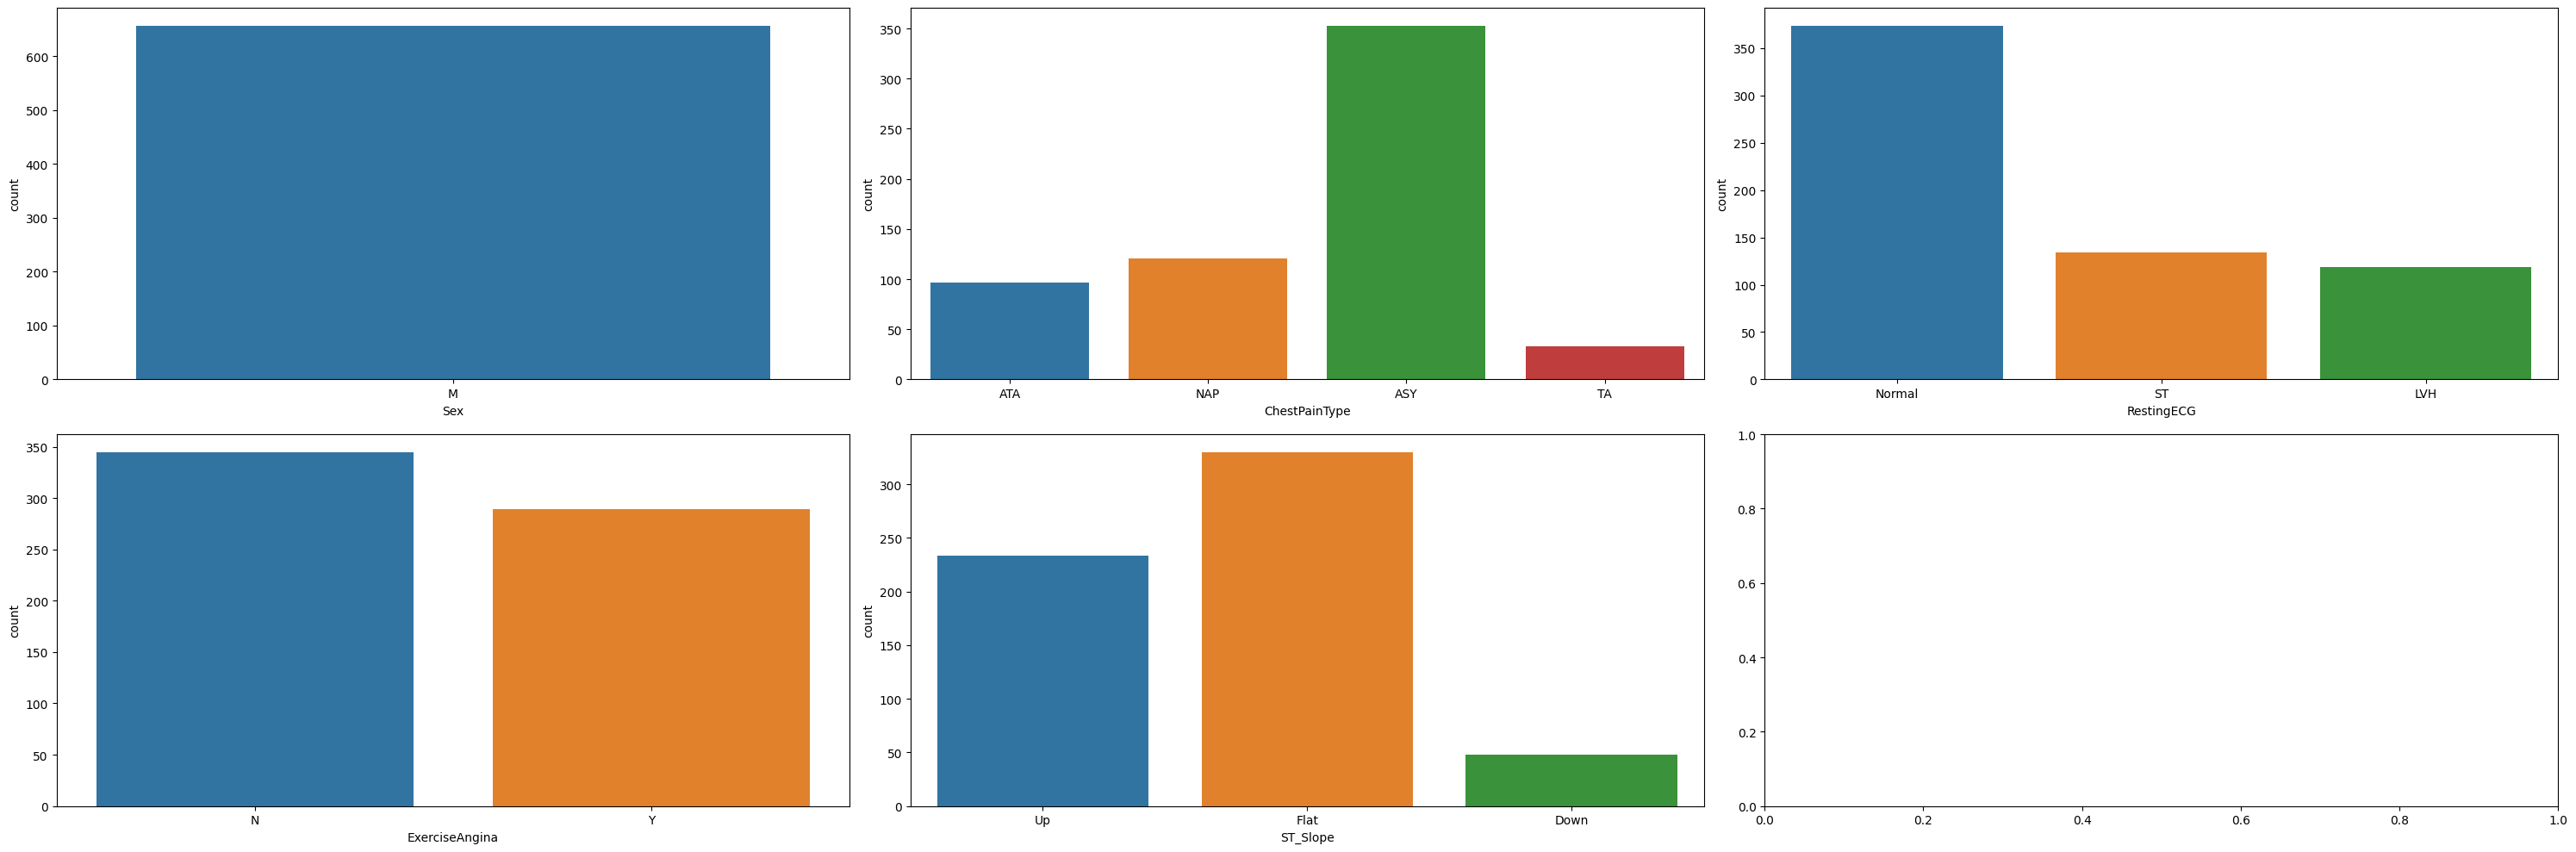

In [12]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================
df_F = df[df['Sex'] == 'F']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df_F.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df_F[colum], 
                ax = axes[i])
    
df_M = df[df['Sex'] == 'M']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df_M.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df_M[colum], 
                ax = axes[i])

fig.tight_layout();

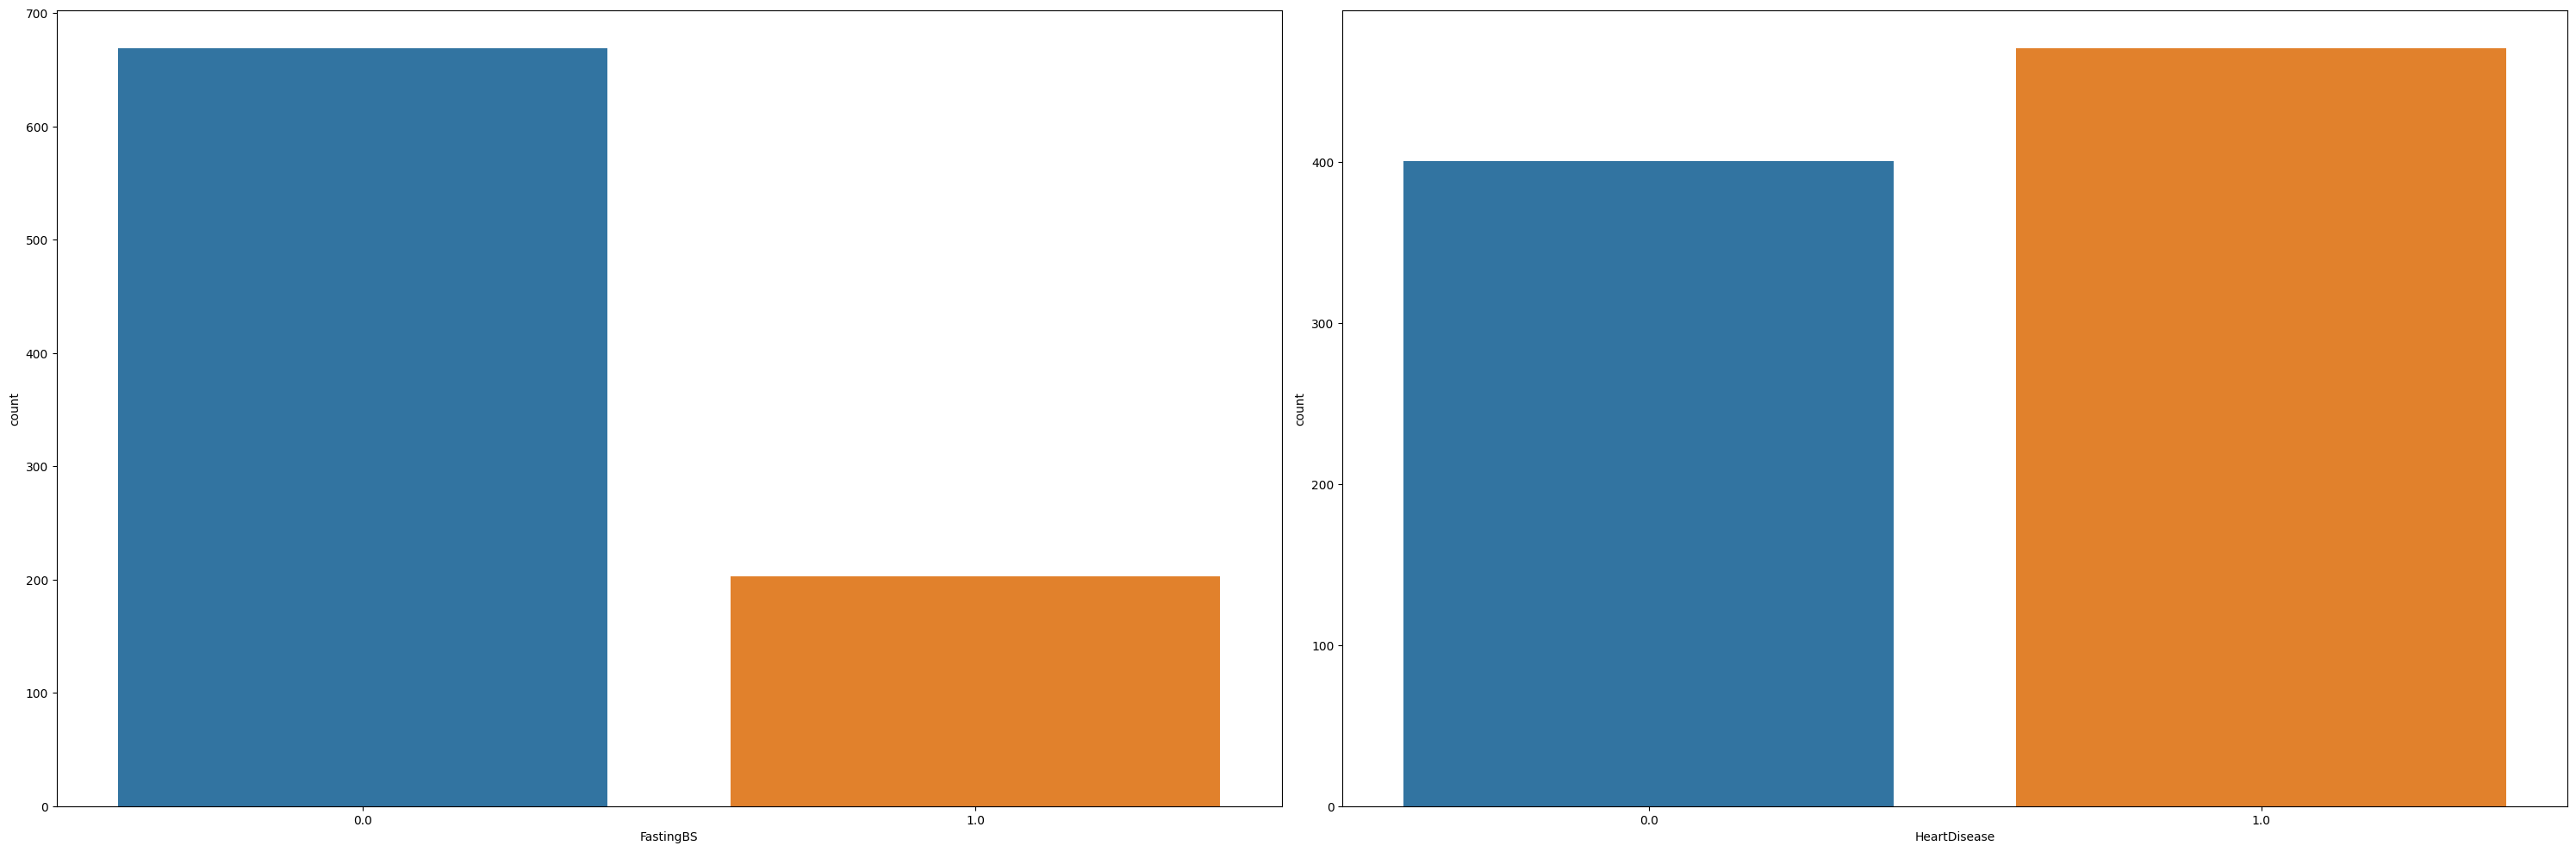

In [13]:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df[['FastingBS', 'HeartDisease']].columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

In [14]:
df['HeartDisease'].value_counts()

1.0    471
0.0    401
Name: HeartDisease, dtype: int64

- revisión otlliers

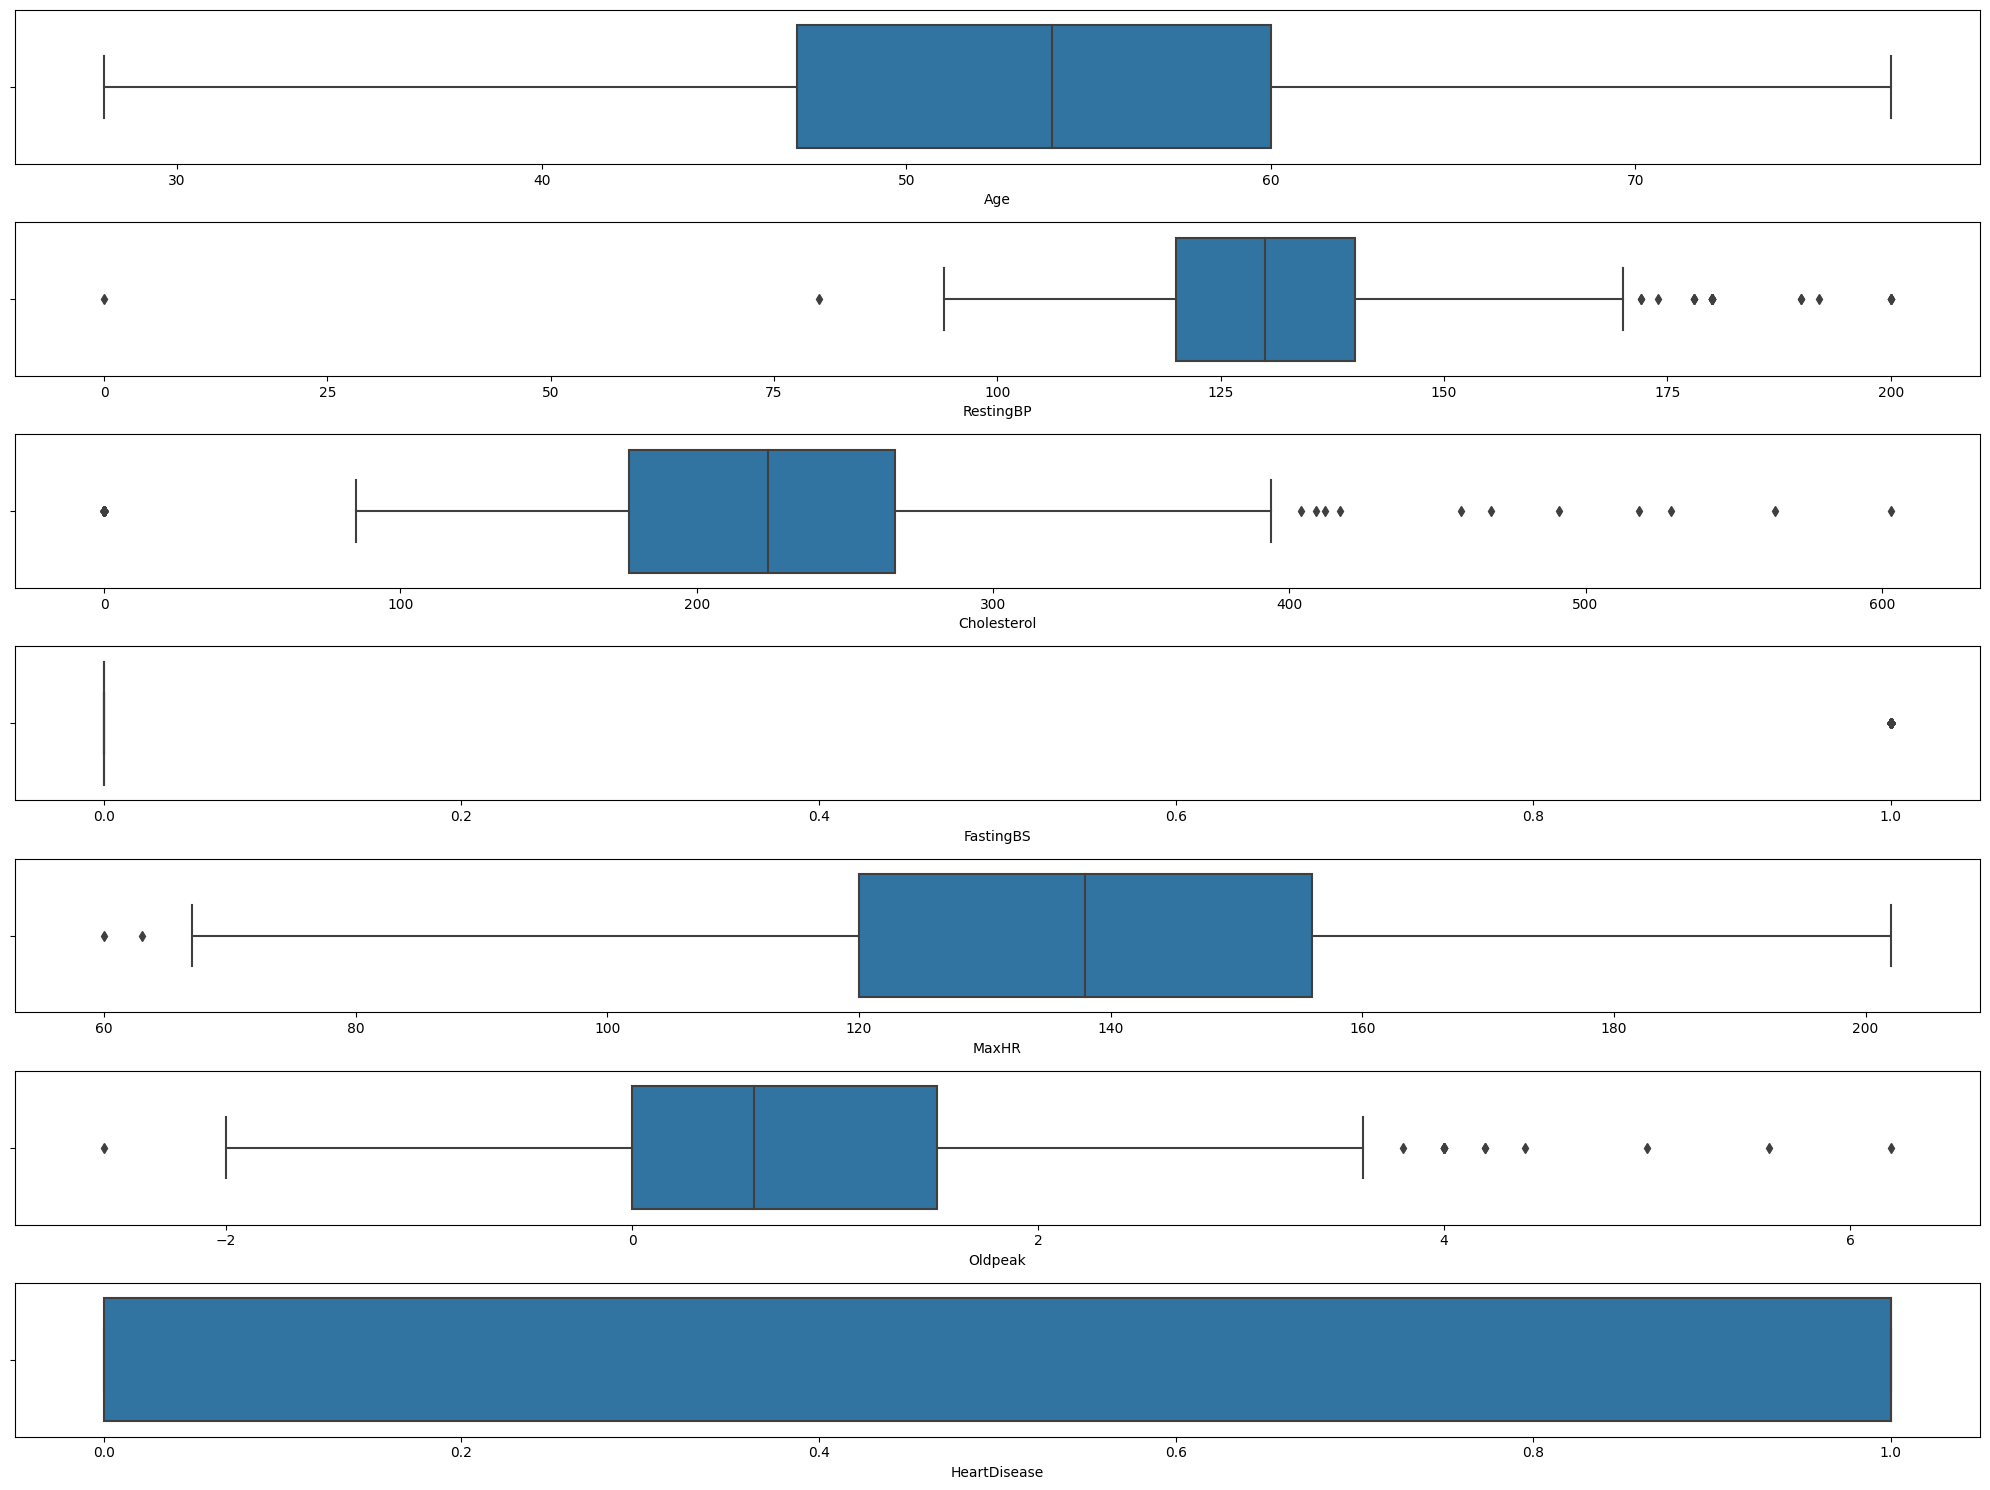

In [15]:
df_numericas = df.select_dtypes(include = np.number)
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    #ax[i].set_title(i)
plt.tight_layout()
plt.show()

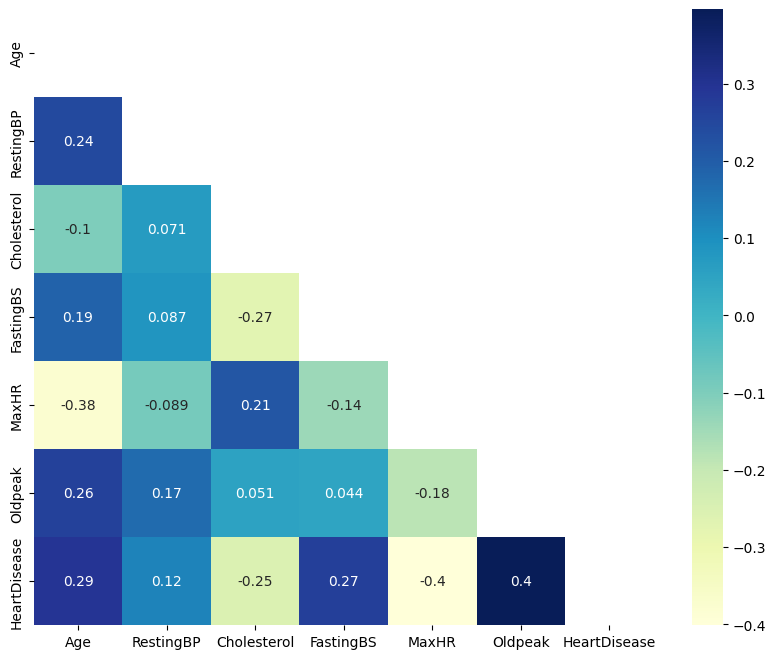

In [16]:
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(),
           cmap = "YlGnBu",
            mask = mask,
           annot = True);

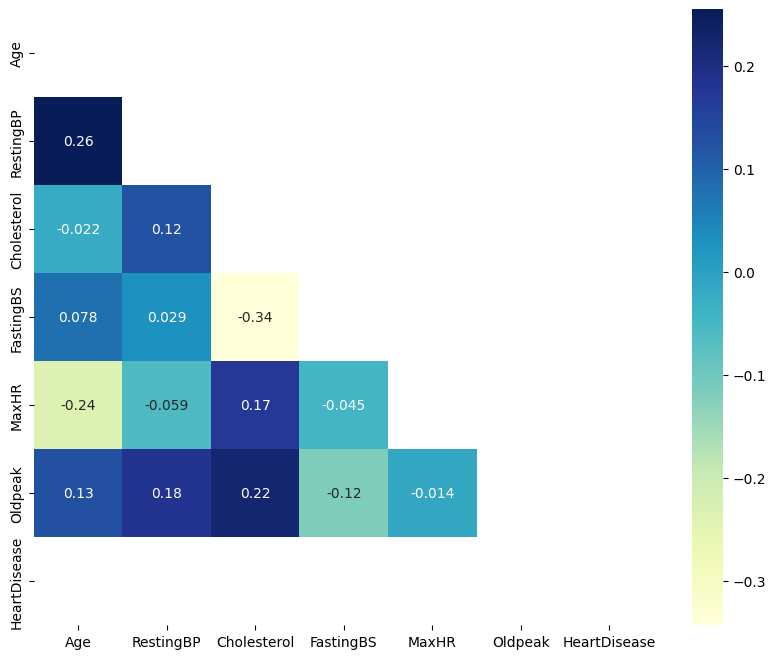

In [17]:
df_heart = df[df['HeartDisease'] == 1]

mask = np.triu(np.ones_like(df_heart.corr(), dtype = bool))
sns.heatmap(df_heart.corr(),
           cmap = "YlGnBu",
            mask = mask,
           annot = True);

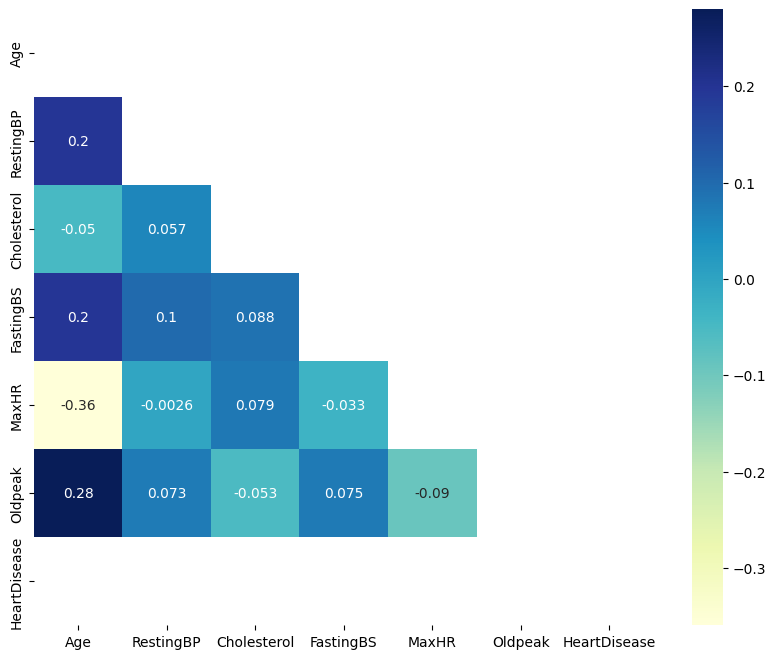

In [18]:
df_heart_no = df[df['HeartDisease'] == 0]

mask = np.triu(np.ones_like(df_heart_no.corr(), dtype = bool))
sns.heatmap(df_heart_no.corr(),
           cmap = "YlGnBu",
            mask = mask,
           annot = True);

# Gestión nulos

In [19]:
df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [20]:
df.isnull().sum() / df.shape[0]

Age               0.079521
Sex               0.100218
ChestPainType     0.079521
RestingBP         0.040305
Cholesterol       0.100218
FastingBS         0.050109
RestingECG        0.050109
MaxHR             0.079521
ExerciseAngina    0.040305
Oldpeak           0.079521
ST_Slope          0.079521
HeartDisease      0.050109
dtype: float64

In [21]:
df.isnull().sum()

Age               73
Sex               92
ChestPainType     73
RestingBP         37
Cholesterol       92
FastingBS         46
RestingECG        46
MaxHR             73
ExerciseAngina    37
Oldpeak           73
ST_Slope          73
HeartDisease      46
dtype: int64

In [22]:
numericas = df.select_dtypes(include = np.number)
# Check for existence of columns
print(df.columns) 
imputer = IterativeImputer()
# Make a copy of numericas dataframe without the two columns
numericas_copy = numericas.drop(['HeartDisease', 'FastingBS'], axis=1)
imputer.fit(numericas_copy)
imputer.transform(numericas_copy)
numericas_trans = pd.DataFrame(imputer.transform(numericas_copy), columns = numericas_copy.columns)
numericas_trans.isnull().sum()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Age            0
RestingBP      0
Cholesterol    0
MaxHR          0
Oldpeak        0
dtype: int64

In [23]:
df[numericas_copy.columns] = numericas_trans
df.isnull().sum()

Age                0
Sex               92
ChestPainType     73
RestingBP          0
Cholesterol        0
FastingBS         46
RestingECG        46
MaxHR              0
ExerciseAngina    37
Oldpeak            0
ST_Slope          73
HeartDisease      46
dtype: int64

In [24]:
df.describe(include='object').T

,count,unique,top,freq
Sex,826,2,M,657
ChestPainType,845,4,ASY,458
RestingECG,872,3,Normal,523
ExerciseAngina,881,2,N,522
ST_Slope,845,3,Flat,425


In [25]:
for column in list(df.select_dtypes(include='object').columns):
    df[column].replace(np.nan, "Desconocido", inplace = True)
    #print(column)

In [26]:
## como FastingBS se trata de una variable booleana, sustituimos los valores por la moda
import statistics
statistics.mode(df['FastingBS'])
df['FastingBS'] = df['FastingBS'].fillna(statistics.mode(df['FastingBS']))

In [27]:
## como HeartDisease se trata de una variable booleana, sustituimos los valores por la moda
import statistics
statistics.mode(df['HeartDisease'])
df['HeartDisease'] = df['HeartDisease'].fillna(statistics.mode(df['HeartDisease']))

# gestión outliers

In [28]:
#vemos donde esta el valor cero de RestingBP
df[df["RestingBP"]==0]
#lo sustituimos por la mediana
df.loc[449, "RestingBP"]=df["RestingBP"].median()
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [33]:
df['Age'] = df['Age'].astype(int)

In [36]:
# Paso 1: calcular la mediana de la columna "RestingBP"
mediana = df["Oldpeak"].median()
# Paso 2: seleccionar los valores negativos de la columna "RestingBP"
valores_negativos = df["Oldpeak"] < 0
# Paso 3: reemplazar los valores negativos por la mediana de la columna
df["Oldpeak"].mask(valores_negativos, mediana, inplace=True)

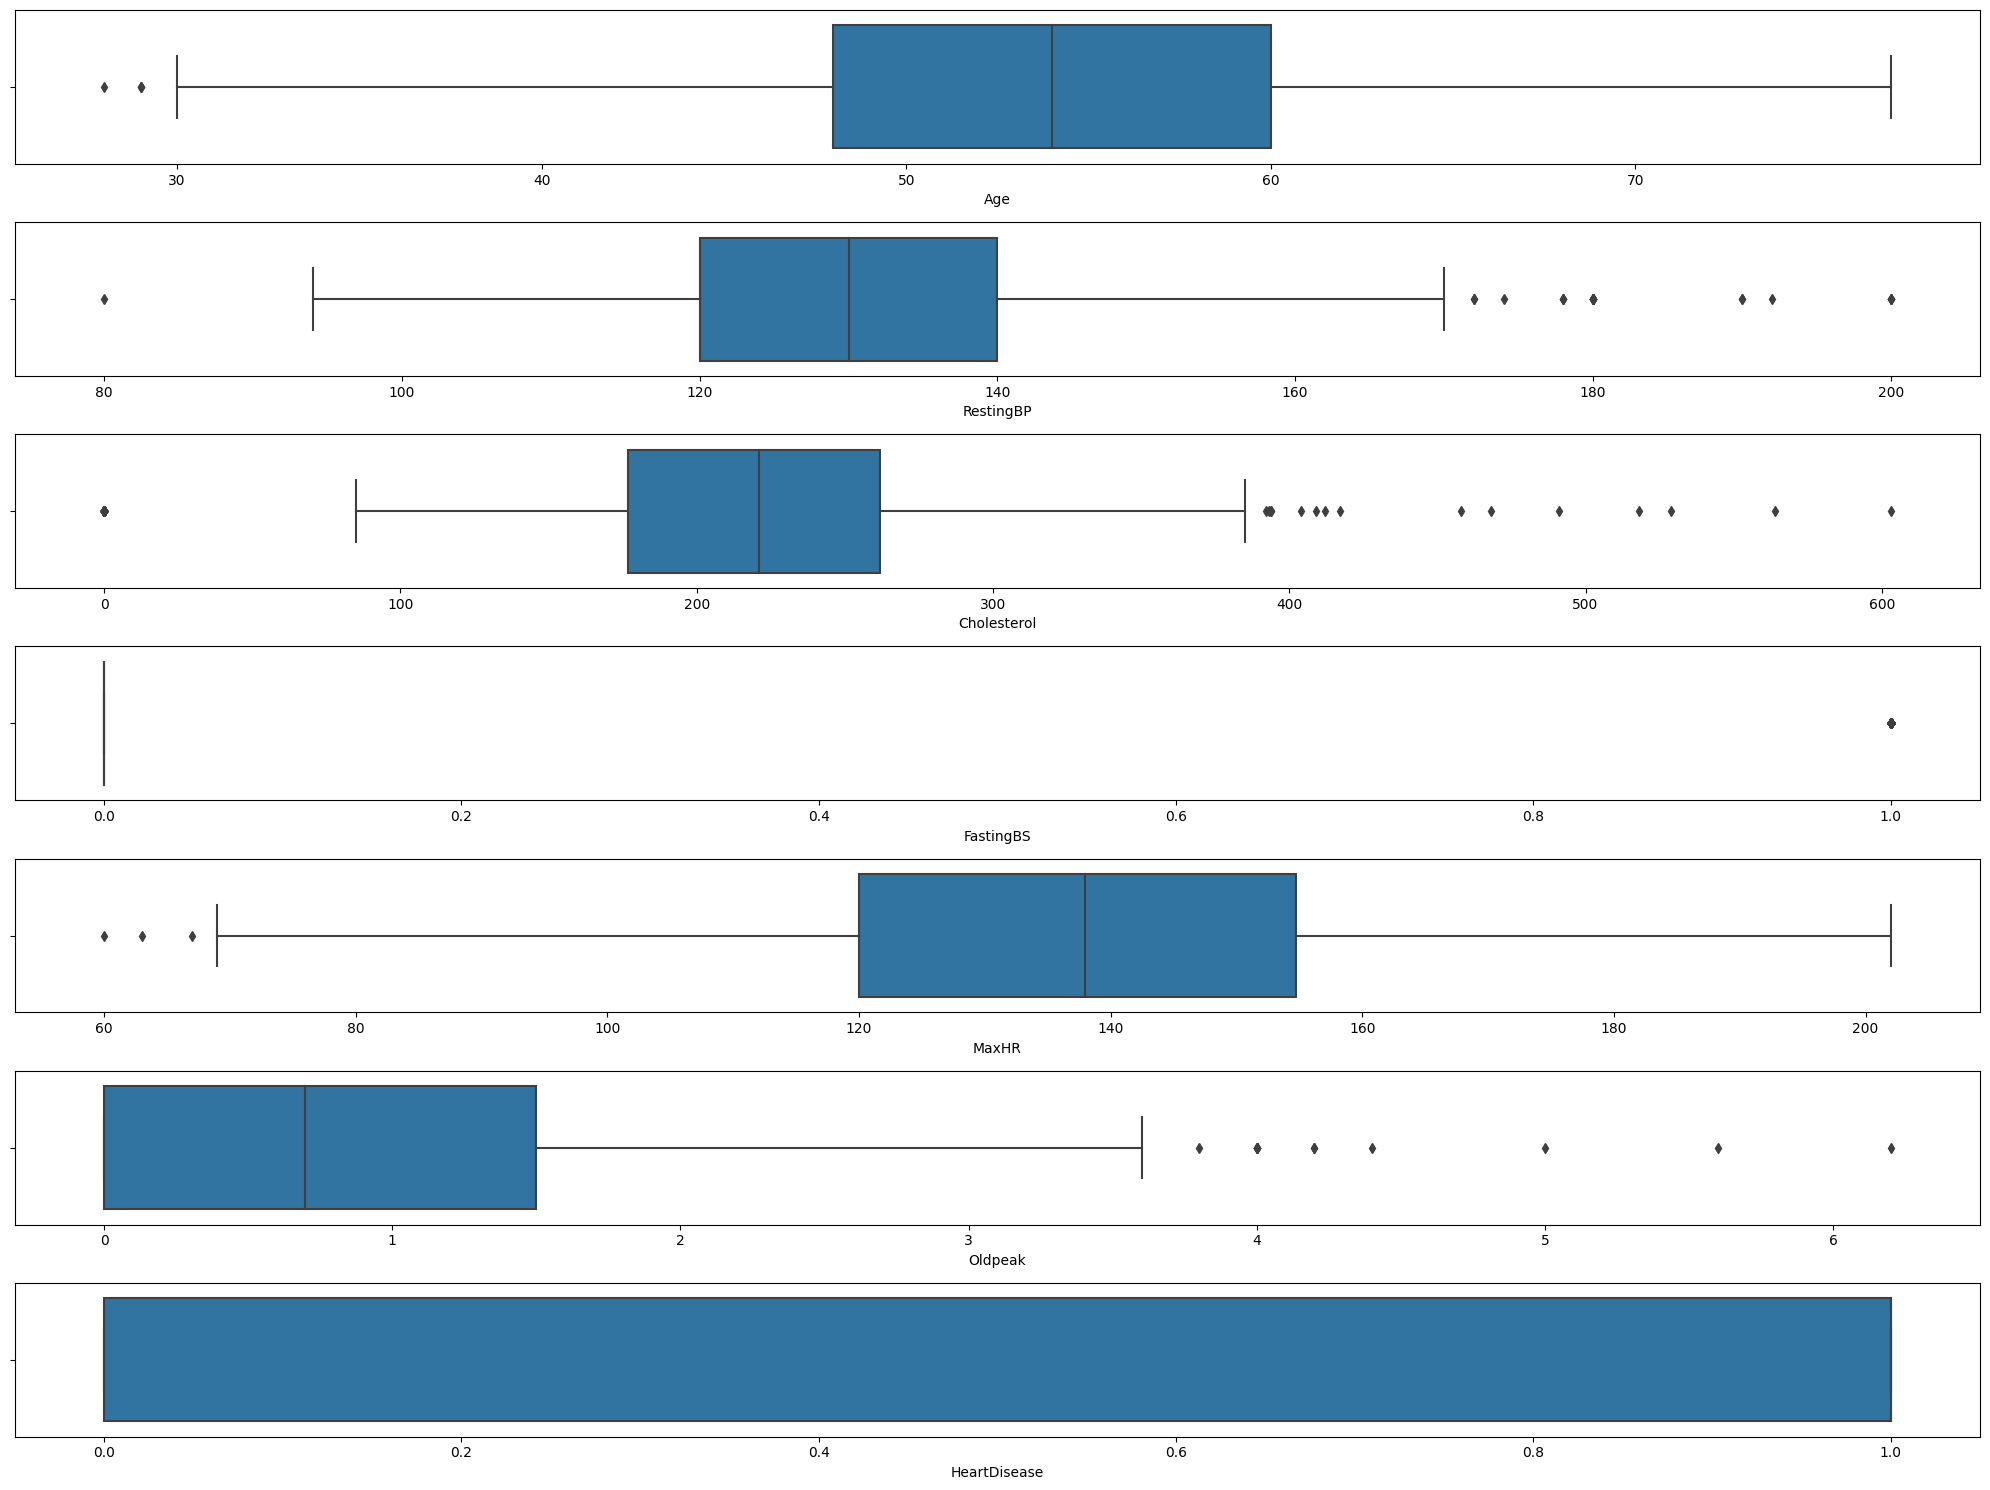

In [37]:
df_numericas = df.select_dtypes(include = np.number)
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    #ax[i].set_title(i)
plt.tight_layout()
plt.show()

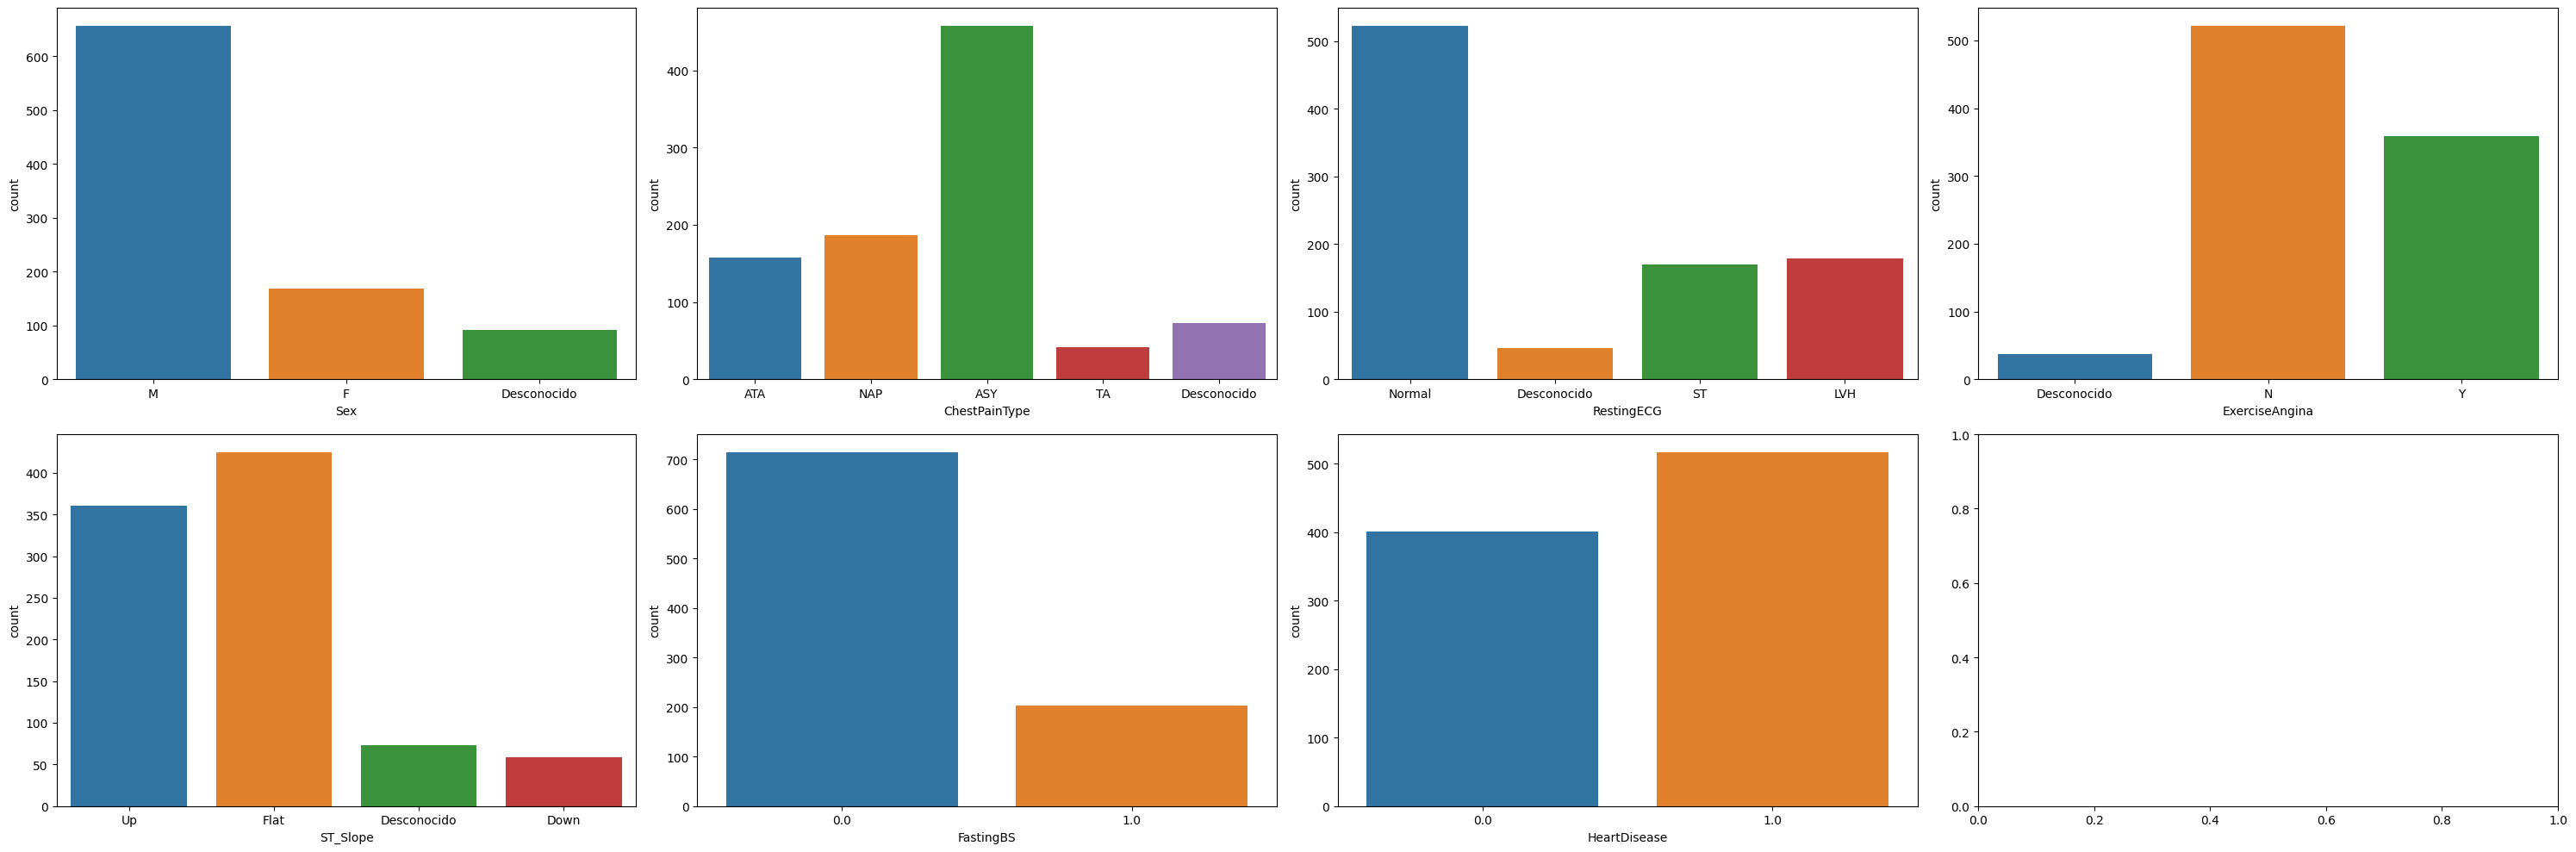

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

axes = axes.flat

columnas_numeric = pd.concat([df.select_dtypes(include='object'), df[['FastingBS', 'HeartDisease']]], axis = 1).columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

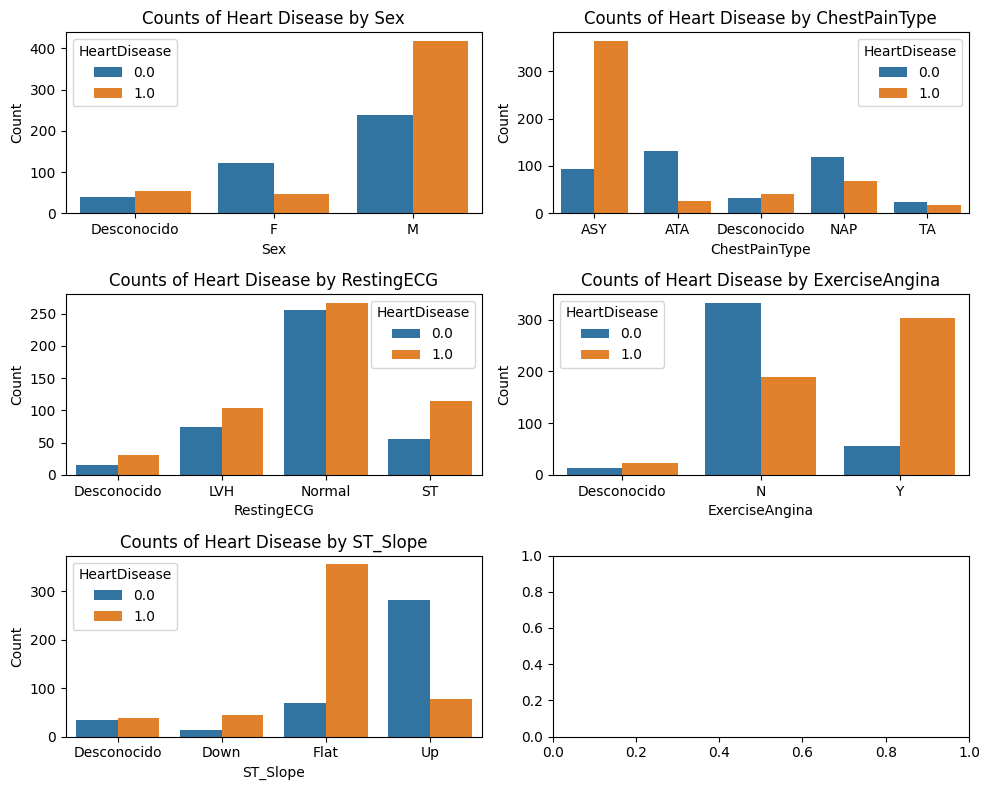

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flat
columnas_object = df.select_dtypes(include="object").columns
for i, colum in enumerate(columnas_object):
    counts = df.groupby([colum, "HeartDisease"]).size().reset_index(name="count")
    sns.barplot(x=colum, y="count", hue="HeartDisease", data=counts, ax=axes[i])
    axes[i].set_title(f"Counts of Heart Disease by {colum}")
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("Count")
fig.tight_layout()
plt.show()

# estandarizar

In [40]:
# construir el modelo de escalador
df_numericas = df.select_dtypes(include = np.number).drop(columns=["FastingBS", "HeartDisease"])
num_col = df_numericas.columns

from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
robust.fit(df[num_col])


# transformamos los datos
X_robust = robust.transform(df[num_col])

df_standard = df.copy()

# por último convertiremos el array que nos devuelve en un dataframe. 

df_standard[num_col] = X_robust
df_standard.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.500000,M,ATA,0.5,0.801336,0.0,Normal,0.978417,Desconocido,-0.465518,Up,0.0
1,-0.416667,F,NAP,1.5,-0.483158,0.0,Normal,0.517986,N,0.201149,Flat,1.0
2,-1.416667,M,ATA,0.0,0.730630,0.0,Desconocido,-1.151079,N,-0.465518,Up,0.0
3,-0.500000,F,ASY,0.4,-0.082490,0.0,Desconocido,-0.863309,Y,0.534482,Desconocido,1.0
4,0.000000,M,NAP,1.0,-0.306393,0.0,Normal,-0.460432,N,-0.465518,Up,0.0


# encoding

In [42]:
df.select_dtypes(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,Desconocido,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,Desconocido,N,Up
3,F,ASY,Desconocido,Y,Desconocido
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,Desconocido,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Desconocido,Y,Flat
916,F,ATA,LVH,N,Flat


In [43]:
df1 = df.copy()
df["ChestPainType"].unique()

# establecemos el orden que queremos. 

orden = ['ATA', 'NAP', 'ASY', 'TA', 'Desconocido']

# iniciamos el método y aplicamos la transformación a los datos. 

ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df1[["ChestPainType"]])

# lo convertimos a dataframe

oe_df =pd.DataFrame(transformados_oe)
oe_df.head()

df1["ChestPainType_encoded"] = oe_df

df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_encoded
0,48,M,ATA,140.0,289.0,0.0,Normal,172.0,Desconocido,0.0,Up,0.0,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0,1
2,37,M,ATA,130.0,283.0,0.0,Desconocido,98.0,N,0.0,Up,0.0,0
3,48,F,ASY,138.0,214.0,0.0,Desconocido,108.0,Y,1.5,Desconocido,1.0,2
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0,1


In [45]:
# establecemos el orden que queremos.
orden = ['M', 'F', 'Desconocido']
# iniciamos el método y aplicamos la transformación a los datos.
ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df1[["Sex"]])
# lo convertimos a dataframe
oe_df =pd.DataFrame(transformados_oe)
oe_df.head()
df1["Sex_encoded"] = oe_df
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_encoded,Sex_encoded
0,48,M,ATA,140.0,289.0,0.0,Normal,172.0,Desconocido,0.0,Up,0.0,0,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0,1,1
2,37,M,ATA,130.0,283.0,0.0,Desconocido,98.0,N,0.0,Up,0.0,0,0
3,48,F,ASY,138.0,214.0,0.0,Desconocido,108.0,Y,1.5,Desconocido,1.0,2,1
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0,1,0


In [47]:
# establecemos el orden que queremos.
orden = ['Normal', 'LVH', 'ST', 'Desconocido']
# iniciamos el método y aplicamos la transformación a los datos.
ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df1[["RestingECG"]])
# lo convertimos a dataframe
oe_df =pd.DataFrame(transformados_oe)
oe_df.head()
df1["RestingECG_encoded"] = oe_df

In [46]:
# establecemos el orden que queremos.
orden = ['Flat', 'Up', 'Desconocido', 'Down']
# iniciamos el método y aplicamos la transformación a los datos.
ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df1[["ST_Slope"]])
# lo convertimos a dataframe
oe_df =pd.DataFrame(transformados_oe)
oe_df.head()
df1["ST_Slope"] = oe_df
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_encoded,Sex_encoded
0,48,M,ATA,140.0,289.0,0.0,Normal,172.0,Desconocido,0.0,1,0.0,0,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,0,1.0,1,1
2,37,M,ATA,130.0,283.0,0.0,Desconocido,98.0,N,0.0,1,0.0,0,0
3,48,F,ASY,138.0,214.0,0.0,Desconocido,108.0,Y,1.5,2,1.0,2,1
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,1,0.0,1,0


In [49]:
# establecemos el orden que queremos.
orden = ['N', 'Y', 'Desconocido']
# iniciamos el método y aplicamos la transformación a los datos.
ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df1[["ExerciseAngina"]])
# lo convertimos a dataframe
oe_df =pd.DataFrame(transformados_oe)
oe_df.head()
df1["ExerciseAngina"] = oe_df
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_encoded,Sex_encoded,RestingECG_encoded
0,48,M,ATA,140.0,289.0,0.0,Normal,172.0,2,0.0,1,0.0,0,0,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,0,1.0,0,1.0,1,1,0
2,37,M,ATA,130.0,283.0,0.0,Desconocido,98.0,0,0.0,1,0.0,0,0,3
3,48,F,ASY,138.0,214.0,0.0,Desconocido,108.0,1,1.5,2,1.0,2,1,3
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,0,0.0,1,0.0,1,0,0


In [50]:
df1_columns = df.select_dtypes(include='object').columns